In [ ]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,
)
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Menambahkan direktori src ke path
sys.path.append(os.path.abspath(os.path.join("..", "src")))

from model_training import save_model, train_and_evaluate_models

warnings.filterwarnings("ignore")

# dataframe setting
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:,.2f}".format

# visualization setting
sns.set()
title_size = 18
y_title = 1.01
title_weight = "bold"

# random state
RANDOM_STATE = 123

In [2]:
train_processed = pd.read_csv("../data/processed/train_processed.csv")
test_processed = pd.read_csv("../data/processed/test_processed.csv")

In [3]:
X_train = train_processed.drop(["price", "street"], axis=1)
y_train = train_processed["price"]

X_test = test_processed.drop(["price", "street"], axis=1)
y_test = test_processed["price"]

In [4]:
selected_features = [
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "sqft_above",
    "yr_built",
    "yr_renovated",
    "statezip",
    "era_category",
    "lat",
    "lng",
    "10th",
    "ave",
    "dr",
    "nw",
    "st",
    "sw",
]

selected_features_2 = [
    "sqft_living",
    "sqft_lot",
    "view",
    "sqft_basement",
    "statezip",
    "lat",
    "lng",
    "waterfront",
]

selected_features_3 = selected_features_2 + X_train.columns[-13:].tolist()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected_2 = X_train[selected_features_2]
X_test_selected_2 = X_test[selected_features_2]

X_train_selected_3 = X_train[selected_features_3]
X_test_selected_3 = X_test[selected_features_3]

# 4. Modeling

## 4.1. Select Modeling Technique

### 4.1.1. Modeling Technique

Permasalahan yang ingin diselesaikan adalah kasus regresi, metode yang di pilih adalah model regressor. Pada penelitian ini kami menggunakan beberapa algoritma regressor yaitu:

- Tree-Based Model
- Boosting Model
- Ensemble Model

### 4.1.2. Modeling Assumptions

- Tree-Based:
  - Tidak memerlukan normalitas data
  - Independen dari multikolinearitas
  - Dibolehkan nnon-lienar relationship
- Boosting:
  - Dibolehkan non-linear relationship
  - Data bersih
- Ensemble:
  - Robust terhadap outliers
  - Tidak terdapat asumsi normalitas data

## 4.2. Test Design

- Model akan dibuat menggunakan data training dengan mencoba membandingkan beberapa model regressor yang telah disebutkan pada bagian modeling technique
- Model akan diuji menggunakan data testing dengan mengukur metrik mean absolute error (MAE), mean square error (MSE), root mean square error (RMSE).

## 4.3. Build Model

In [5]:
# Models dictionary
models = {
    "XGBoost": XGBRegressor(random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "Random Forest": RandomForestRegressor(random_state=RANDOM_STATE),
    "LightGBM": LGBMRegressor(random_state=RANDOM_STATE, verbose=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=RANDOM_STATE),
    "Ada Boost": AdaBoostRegressor(random_state=RANDOM_STATE),
    "Voting": VotingRegressor(
        estimators=[
            ("xgb", XGBRegressor(random_state=RANDOM_STATE)),
            ("lgb", LGBMRegressor(random_state=RANDOM_STATE, verbose=-1)),
        ]
    ),
}

## 4.4. Assess Model

### 4.4.1. Model Assessment

#### **a. all features**

In [6]:
result_all_features = train_and_evaluate_models(
    X_train, X_test, y_train, y_test, models
)

======================================== XGBoost Regressor =========================================
Training
Train MAE: 21392.617362826622
Train MSE: 853172115.3283162
Train RMSE: 29209.110142698908
Train R2: 0.9913896000648617

Testing
Test MAE: 92058.80506022458
Test MSE: 25336249976.922157
Test RMSE: 159173.64724388946
Test R2: 0.7284023178841047
===================================== Decision Tree Regressor ======================================
Training
Train MAE: 20.12217031979878
Train MSE: 563420.7689543657
Train RMSE: 750.6135949703854
Train R2: 0.9999943138341428

Testing
Test MAE: 132888.47786230085
Test MSE: 55547092959.58836
Test RMSE: 235684.30783484157
Test R2: 0.40455032967222615
===================================== Random Forest Regressor ======================================
Training
Train MAE: 35868.06376004125
Train MSE: 3764366389.847561
Train RMSE: 61354.43251997007
Train R2: 0.9620091895449401

Testing
Test MAE: 97197.16310653544
Test MSE: 28950315659.56967
Tes

In [7]:
result_all_features

,Model,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2,Training Time (seconds)
0,XGBoost,"21,392.62","92,058.81","853,172,115.33","25,336,249,976.92","29,209.11","159,173.65",0.99,0.73,0.39
1,Decision Tree,20.12,"132,888.48","563,420.77","55,547,092,959.59",750.61,"235,684.31",1.00,0.40,0.09
2,Random Forest,"35,868.06","97,197.16","3,764,366,389.85","28,950,315,659.57","61,354.43","170,147.92",0.96,0.69,2.93
3,LightGBM,"52,046.31","93,221.16","5,898,400,472.40","27,710,049,845.12","76,801.04","166,463.36",0.94,0.70,0.24
4,Gradient Boosting,"80,190.73","95,156.71","14,867,224,713.74","26,870,857,373.05","121,931.23","163,923.33",0.85,0.71,0.71
5,Ada Boost,"187,722.01","198,705.09","50,140,670,673.62","59,270,816,575.32","223,921.13","243,455.98",0.49,0.36,0.34
6,Voting,"35,431.86","89,832.66","2,471,961,903.62","25,530,024,023.49","49,718.83","159,781.18",0.98,0.73,0.38


#### **b. selected features**

In [8]:
result_selected_features_2 = train_and_evaluate_models(
    X_train_selected_2, X_test_selected_2, y_train, y_test, models
)

======================================== XGBoost Regressor =========================================
Training
Train MAE: 30465.531714331297
Train MSE: 1962663637.19726
Train RMSE: 44301.95974443185
Train R2: 0.9801923685141554

Testing
Test MAE: 93466.16042279167
Test MSE: 28242273956.34568
Test RMSE: 168054.37797434995
Test R2: 0.697250534265631
===================================== Decision Tree Regressor ======================================
Training
Train MAE: 20.12217031979878
Train MSE: 563420.7689543657
Train RMSE: 750.6135949703854
Train R2: 0.9999943138341428

Testing
Test MAE: 116760.16162117939
Test MSE: 35903415666.426346
Test RMSE: 189481.9665995325
Test R2: 0.6151251868793922
===================================== Random Forest Regressor ======================================
Training
Train MAE: 36338.56015348292
Train MSE: 3878393574.121354
Train RMSE: 62276.74986799933
Train R2: 0.9608584022155895

Testing
Test MAE: 94155.99436923786
Test MSE: 26920538926.100563
Test RM

In [9]:
result_selected_features_2

,Model,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2,Training Time (seconds)
0,XGBoost,"30,465.53","93,466.16","1,962,663,637.20","28,242,273,956.35","44,301.96","168,054.38",0.98,0.70,0.19
1,Decision Tree,20.12,"116,760.16","563,420.77","35,903,415,666.43",750.61,"189,481.97",1.00,0.62,0.04
2,Random Forest,"36,338.56","94,155.99","3,878,393,574.12","26,920,538,926.10","62,276.75","164,074.80",0.96,0.71,1.34
3,LightGBM,"62,417.75","89,115.79","9,096,989,333.10","26,130,158,198.43","95,378.14","161,648.25",0.91,0.72,0.09
4,Gradient Boosting,"83,067.98","94,300.47","16,751,764,122.54","26,430,904,377.53","129,428.61","162,575.84",0.83,0.72,0.36
5,Ada Boost,"151,494.02","157,396.41","38,593,711,586.65","46,299,769,356.51","196,452.82","215,173.81",0.61,0.50,0.08
6,Voting,"45,324.16","88,366.25","4,368,461,927.13","26,039,234,376.62","66,094.34","161,366.77",0.96,0.72,0.25


In [10]:
result_selected_features = train_and_evaluate_models(
    X_train_selected, X_test_selected, y_train, y_test, models
)

======================================== XGBoost Regressor =========================================
Training
Train MAE: 22050.893967045635
Train MSE: 959405211.5004187
Train RMSE: 30974.266924342515
Train R2: 0.9903174723804754

Testing
Test MAE: 94811.75001961723
Test MSE: 27102850262.24419
Test RMSE: 164629.43315897128
Test R2: 0.7094648451659329
===================================== Decision Tree Regressor ======================================
Training
Train MAE: 20.12217031979878
Train MSE: 563420.7689543657
Train RMSE: 750.6135949703854
Train R2: 0.9999943138341428

Testing
Test MAE: 127428.22578725847
Test MSE: 48977530008.64979
Test RMSE: 221308.67585490135
Test R2: 0.4749742507976733
===================================== Random Forest Regressor ======================================
Training
Train MAE: 35828.813550337654
Train MSE: 3795995142.444904
Train RMSE: 61611.64778225708
Train R2: 0.961689985243229

Testing
Test MAE: 97099.19415843394
Test MSE: 28417711618.071167
Test

In [11]:
result_selected_features

,Model,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2,Training Time (seconds)
0,XGBoost,"22,050.89","94,811.75","959,405,211.50","27,102,850,262.24","30,974.27","164,629.43",0.99,0.71,0.28
1,Decision Tree,20.12,"127,428.23","563,420.77","48,977,530,008.65",750.61,"221,308.68",1.00,0.47,0.07
2,Random Forest,"35,828.81","97,099.19","3,795,995,142.44","28,417,711,618.07","61,611.65","168,575.54",0.96,0.70,2.20
3,LightGBM,"53,086.49","92,832.45","6,243,834,516.06","27,082,323,910.21","79,017.94","164,567.08",0.94,0.71,0.12
4,Gradient Boosting,"81,098.29","96,643.69","15,160,018,265.78","27,059,268,288.42","123,126.03","164,497.02",0.85,0.71,0.54
5,Ada Boost,"182,938.85","193,905.59","47,905,810,294.84","57,382,298,011.21","218,873.96","239,546.02",0.52,0.38,0.26
6,Voting,"36,165.39","91,224.37","2,653,960,895.85","26,239,209,800.73","51,516.61","161,985.21",0.97,0.72,0.29


In [12]:
result_selected_features_3 = train_and_evaluate_models(
    X_train_selected_3, X_test_selected_3, y_train, y_test, models
)

======================================== XGBoost Regressor =========================================
Training
Train MAE: 29825.345070534855
Train MSE: 1973585946.6496663
Train RMSE: 44425.059894722326
Train R2: 0.9800821381738631

Testing
Test MAE: 93568.1690187486
Test MSE: 26696570868.922867
Test RMSE: 163390.85307606074
Test R2: 0.7138200493345859
===================================== Decision Tree Regressor ======================================
Training
Train MAE: 20.12217031979878
Train MSE: 563420.7689543657
Train RMSE: 750.6135949703854
Train R2: 0.9999943138341428

Testing
Test MAE: 123257.01314007062
Test MSE: 45684695791.96784
Test RMSE: 213739.7852342138
Test R2: 0.5102725345475311
===================================== Random Forest Regressor ======================================
Training
Train MAE: 35958.83545698479
Train MSE: 3752287828.1495
Train RMSE: 61255.92075995185
Train R2: 0.9621310890362538

Testing
Test MAE: 94407.42111213766
Test MSE: 27512904296.347855
Test R

### 4.4.2. Revised Parameter Settings

#### **a XGBoost**

In [13]:
# # XGBoost
# def objective(trial):
#     param = {
#         "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
#         "max_depth": trial.suggest_int("max_depth", 3, 10),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.01),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0, step=0.1),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0, step=0.1),
#         "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
#         "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
#     }

#     model = XGBRegressor(**param, random_state=RANDOM_STATE)
#     # log_model = TransformedTargetRegressor(model, func=np.log1p, inverse_func=np.expm1)

#     score = cross_val_score(
#         model,
#         X_train_selected_3,
#         y_train,
#         cv=10,
#         scoring="neg_root_mean_squared_error",
#     ).mean()

#     return score


# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# print()
# print("Best RMSE:", -study.best_value)
# print("best params:")
# for k, v in study.best_params.items():
#     print(f"{k} = {v},")

#### **b. Decision Tree**

In [14]:
# # Decision Tree
# def objective(trial):
#     param = {
#         "criterion": trial.suggest_categorical(
#             "criterion", ["squared_error", "friedman_mse", "absolute_error", "poisson"]
#         ),
#         "splitter": trial.suggest_categorical("splitter", ["best", "random"]),
#         "max_depth": trial.suggest_int("max_depth", 3, 20),
#         "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
#         "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
#         "max_features": trial.suggest_categorical(
#             "max_features", ["auto", "sqrt", "log2", None]
#         ),
#         "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 10, 1000, step=50),
#         "min_impurity_decrease": trial.suggest_float(
#             "min_impurity_decrease", 0.0, 0.5, step=0.01
#         ),
#     }

#     model = DecisionTreeRegressor(**param, random_state=RANDOM_STATE)

#     score = cross_val_score(
#         model, X_train, y_train, cv=10, scoring="neg_root_mean_squared_error"
#     ).mean()

#     return score


# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# print()
# print("Best RMSE:", -study.best_value)
# print("Best Parameters:")
# for k, v in study.best_params.items():
#     print(f"{k} = {v},")


#### **c. Random Forest**

In [15]:
# def objective(trial):
#     param = {
#         "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
#         "max_depth": trial.suggest_int("max_depth", 3, 20),
#         "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
#         "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
#         "max_features": trial.suggest_categorical(
#             "max_features", ["auto", "sqrt", "log2"]
#         ),
#         "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
#     }

#     model = RandomForestRegressor(**param, random_state=RANDOM_STATE)

#     score = cross_val_score(
#         model,
#         X_train_selected_2,
#         y_train,
#         cv=10,
#         scoring="neg_root_mean_squared_error",
#     ).mean()

#     return score


# # Hyperparameter tuning
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# # Print the best parameters and score
# print()
# print("Best RMSE:", -study.best_value)
# print("Best params:")
# for k, v in study.best_params.items():
#     print(f"{k} = {v},")


#### **d. LightGBM**

In [16]:
# def objective(trial):
#     max_depth = trial.suggest_int("max_depth", 3, 10)
#     num_leaves = trial.suggest_int("num_leaves", 8, min(2**max_depth, 128))
#     min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 100, 1000, step=50)

#     param = {
#         "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.01),
#         "max_depth": max_depth,
#         "num_leaves": num_leaves,
#         "min_data_in_leaf": min_data_in_leaf,
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0, step=0.1),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0, step=0.1),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
#         "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
#     }

#     model = LGBMRegressor(**param, random_state=RANDOM_STATE)
#     log_model = TransformedTargetRegressor(model, func=np.log1p, inverse_func=np.expm1)

#     score = cross_val_score(
#         log_model,
#         X_train_selected,
#         y_train,
#         cv=10,
#         scoring="neg_root_mean_squared_error",
#     ).mean()

#     return score


# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# print()
# print("Best RMSE:", -study.best_value)
# print("Best parameters:")
# for k, v in study.best_params.items():
#     print(f"{k} = {v},")

### 4.4.3.  Assess Tuned Model

In [ ]:
tuned_models = {
    "XGBoost": XGBRegressor(random_state=RANDOM_STATE),
    "XGBoost (Tuned)": XGBRegressor(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.04,
        subsample=0.6,
        colsample_bytree=0.5,
        min_child_weight=4,
        reg_alpha=0.7978509830861502,
        reg_lambda=0.8120386269113005,
        random_state=RANDOM_STATE,
    ),
    "XGBoost (Tuned 2)": XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.16,
        subsample=0.9,
        colsample_bytree=0.5,
        min_child_weight=6,
        reg_alpha=0.46792532202572695,
        reg_lambda=0.39541719809581255,
        random_state=RANDOM_STATE,
    ),
    "XGBoost (Tuned 3)": XGBRegressor(
        n_estimators=800,
        max_depth=3,
        learning_rate=0.060000000000000005,
        subsample=0.8,
        colsample_bytree=0.5,
        min_child_weight=9,
        reg_alpha=0.7175442757955732,
        reg_lambda=0.38359031966847423,
        random_state=RANDOM_STATE,
    ),
    "XGBoost (Tuned 4)": XGBRegressor(
        n_estimators=700,
        max_depth=3,
        learning_rate=0.08,
        subsample=1.0,
        colsample_bytree=0.5,
        min_child_weight=4,
        reg_alpha=0.7068640953211469,
        reg_lambda=0.7573623752192142,
        random_state=RANDOM_STATE,
    ),
    "Decision Tree": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "Decision Tree (Tuned)": DecisionTreeRegressor(
        criterion="absolute_error",
        splitter="best",
        max_depth=11,
        min_samples_split=5,
        min_samples_leaf=8,
        max_features=None,
        max_leaf_nodes=160,
        min_impurity_decrease=0.31,
        random_state=RANDOM_STATE,
    ),
    "Decision Tree (Tuned 2)": DecisionTreeRegressor(
        criterion="friedman_mse",
        splitter="random",
        max_depth=20,
        min_samples_split=17,
        min_samples_leaf=5,
        max_leaf_nodes=160,
        min_impurity_decrease=0.21,
        random_state=RANDOM_STATE,
    ),
    "Random Forest": RandomForestRegressor(random_state=RANDOM_STATE),
    "Random Forest (Tuned)": RandomForestRegressor(
        n_estimators=700,
        max_depth=14,
        min_samples_split=6,
        min_samples_leaf=1,
        max_features="sqrt",
        bootstrap=True,
        random_state=RANDOM_STATE,
    ),
    "LightGBM": LGBMRegressor(random_state=RANDOM_STATE, verbose=-1),
    "LightGBM (Tuned)": LGBMRegressor(
        n_estimators=700,
        max_depth=0,
        learning_rate=0.01,
        num_leaves=90,
        min_child_samples=5,
        subsample=0.6,
        subsample_freq=8,
        colsample_bytree=0.5,
        reg_alpha=0.8362669942713901,
        reg_lambda=0.906586919300989,
        random_state=RANDOM_STATE,
        verbose=-1,
    ),
    "LightGBM (Tuned 2)": LGBMRegressor(
        n_estimators=400,
        max_depth=2,
        learning_rate=0.06999999999999999,
        num_leaves=220,
        min_child_samples=20,
        subsample=0.9,
        subsample_freq=4,
        colsample_bytree=0.6,
        reg_alpha=0.5327964110785868,
        reg_lambda=0.288777009087254,
        random_state=RANDOM_STATE,
        verbose=-1,
    ),
    "LightGBM (Tuned 3)": LGBMRegressor(
        max_depth=5,
        num_leaves=16,
        min_data_in_leaf=100,
        n_estimators=500,
        learning_rate=0.12,
        subsample=0.5,
        colsample_bytree=0.5,
        reg_alpha=0.024470811628100504,
        reg_lambda=0.7058470001708224,
        random_state=RANDOM_STATE,
    ),
    "Gradient Boosting": GradientBoostingRegressor(random_state=RANDOM_STATE),
    "Voting": VotingRegressor(
        estimators=[
            (
                "xgb",  # tuned 3
                XGBRegressor(
                    n_estimators=700,
                    max_depth=3,
                    learning_rate=0.08,
                    subsample=1.0,
                    colsample_bytree=0.5,
                    min_child_weight=4,
                    reg_alpha=0.7068640953211469,
                    reg_lambda=0.7573623752192142,
                    random_state=RANDOM_STATE,
                ),
            ),
            ("lgb", LGBMRegressor(random_state=RANDOM_STATE, verbose=-1)),
        ]
    ),
}

#### **a. Tuned Model Assesment**

In [18]:
train_and_evaluate_models(
    X_train_selected_3, X_test_selected_3, y_train, y_test, tuned_models
)

======================================== XGBoost Regressor =========================================
Training
Train MAE: 29825.345070534855
Train MSE: 1973585946.6496663
Train RMSE: 44425.059894722326
Train R2: 0.9800821381738631

Testing
Test MAE: 93568.1690187486
Test MSE: 26696570868.922867
Test RMSE: 163390.85307606074
Test R2: 0.7138200493345859
==================================== XGBoost (Tuned) Regressor =====================================
Training
Train MAE: 57686.507506316746
Train MSE: 7424885962.033589
Train RMSE: 86167.77798013356
Train R2: 0.9250664239286558

Testing
Test MAE: 87526.36767473374
Test MSE: 23084775437.575966
Test RMSE: 151936.74814729966
Test R2: 0.7525375102186596
=================================== XGBoost (Tuned 2) Regressor ====================================
Training
Train MAE: 54010.68527461283
Train MSE: 6492805517.692299
Train RMSE: 80577.94684460692
Train R2: 0.934473184010602

Testing
Test MAE: 87937.06401345196
Test MSE: 24134990798.538177
Tes

,Model,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2,Training Time (seconds)
0,XGBoost,"29,825.35","93,568.17","1,973,585,946.65","26,696,570,868.92","44,425.06","163,390.85",0.98,0.71,0.30
1,XGBoost (Tuned),"57,686.51","87,526.37","7,424,885,962.03","23,084,775,437.58","86,167.78","151,936.75",0.93,0.75,0.75
2,XGBoost (Tuned 2),"54,010.69","87,937.06","6,492,805,517.69","24,134,990,798.54","80,577.95","155,354.40",0.93,0.74,0.20
3,XGBoost (Tuned 3),"68,558.01","88,869.30","11,059,842,215.03","23,273,416,124.57","105,165.78","152,556.27",0.89,0.75,1.41
4,XGBoost (Tuned 4),"63,523.31","86,595.38","9,511,258,708.87","23,043,842,813.59","97,525.68","151,801.99",0.90,0.75,0.72
5,Decision Tree,20.12,"123,257.01","563,420.77","45,684,695,791.97",750.61,"213,739.79",1.00,0.51,0.06
6,Decision Tree (Tuned),"84,090.64","109,795.45","22,699,014,160.37","37,940,315,874.35","150,661.92","194,782.74",0.77,0.59,0.32
7,Decision Tree (Tuned 2),"102,282.12","118,109.18","26,693,851,490.03","38,970,233,597.57","163,382.53","197,408.80",0.73,0.58,0.01
8,Random Forest,"35,958.84","94,407.42","3,752,287,828.15","27,512,904,296.35","61,255.92","165,870.14",0.96,0.71,1.75
9,Random Forest (Tuned),"67,047.99","97,315.54","11,441,435,937.71","27,950,092,885.55","106,964.65","167,182.81",0.88,0.70,2.53


In [24]:
best_model = tuned_models["XGBoost (Tuned)"]

In [25]:
# check cross-validation score in train set to avoid overfitting
score = cross_val_score(
    best_model,
    X_train_selected_3,
    y_train,
    cv=10,
    scoring="neg_root_mean_squared_error",
).mean()

print("Best Model CV Score: ", -score)

Best Model CV Score:  151142.52761175993


In [20]:
def model_evaluation(X_train, y_train, X_test, y_test, model_name, model_to_evaluate):
    # Fit model on training data
    model_to_evaluate.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = model_to_evaluate.predict(X_train)
    train_residuals = y_train - y_train_pred

    # Predict on test data
    y_test_pred = model_to_evaluate.predict(X_test)
    test_residuals = y_test - y_test_pred

    # Display results in a dataframe
    result_train = pd.DataFrame(
        {"actual": y_train, "predict": y_train_pred, "residual": train_residuals}
    )
    result_test = pd.DataFrame(
        {"actual": y_test, "predict": y_test_pred, "residual": test_residuals}
    )

    print(f"{model_name} Training Data Results")
    display(result_train.sort_values(by="residual"))

    print(f"\n{model_name} Test Data Results")
    display(result_test.sort_values(by="residual"))

    # Create subplots with 2 rows (train and test) and 3 columns for each plot
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))

    # Titles and configurations
    eval_titles = [
        "Actual vs Predicted Values",
        "Residual Plot",
        "Distribution of Actual vs Predicted Values",
    ]
    data_splits = ["Training", "Testing"]
    color_schemes = [("blue", "purple", "orange"), ("blue", "purple", "orange")]

    # Loop through training and testing data to create each plot
    for i, (y_actual, y_pred, residuals) in enumerate(
        [
            (y_train, y_train_pred, train_residuals),
            (y_test, y_test_pred, test_residuals),
        ]
    ):
        color_actual, color_residuals, color_pred = color_schemes[i]

        # Scatter Plot: Predicted vs. Actual
        axes[i, 0].scatter(
            y_actual, y_pred, alpha=0.5, color=color_actual, label="Predicted vs Actual"
        )
        axes[i, 0].plot(
            [y_actual.min(), y_actual.max()],
            [y_actual.min(), y_actual.max()],
            "r--",
            lw=2,
            label="Ideal Line",
        )
        axes[i, 0].set_xlabel("Actual Values")
        axes[i, 0].set_ylabel("Predicted Values")
        axes[i, 0].set_title(f"{data_splits[i]} Data - {eval_titles[0]}")
        axes[i, 0].legend()

        # Residual Plot: Errors vs. Predicted
        axes[i, 1].scatter(y_pred, residuals, alpha=0.5, color=color_residuals)
        axes[i, 1].axhline(y=0, color="r", linestyle="--", linewidth=2)
        axes[i, 1].set_xlabel("Predicted Values")
        axes[i, 1].set_ylabel("Residuals")
        axes[i, 1].set_title(f"{data_splits[i]} Data - {eval_titles[1]}")

        # Distribution Plot: Actual vs Predicted Density
        sns.kdeplot(
            y_actual, color=color_actual, label="Actual", fill=True, ax=axes[i, 2]
        )
        sns.kdeplot(
            y_pred, color=color_pred, label="Predicted", fill=True, ax=axes[i, 2]
        )
        axes[i, 2].set_xlabel("Value")
        axes[i, 2].set_ylabel("Density")
        axes[i, 2].set_title(f"{data_splits[i]} Data - {eval_titles[2]}")
        axes[i, 2].legend()

    plt.suptitle(f"{model_name} Model Evaluation", fontweight="bold", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
    plt.show()


XGBoost Tuned Training Data Results


,actual,predict,residual
409,"84,350.00","794,387.12","-710,037.12"
763,"435,000.00","948,607.75","-513,607.75"
344,"188,000.00","648,602.88","-460,602.88"
1633,"375,000.00","804,939.00","-429,939.00"
891,"550,000.00","946,411.38","-396,411.38"
...,...,...,...
2215,"2,400,000.00","1,956,702.12","443,297.88"
1508,"1,150,000.00","673,106.75","476,893.25"
2254,"1,365,000.00","871,825.50","493,174.50"
2579,"1,755,000.00","1,101,637.50","653,362.50"



XGBoost Tuned Test Data Results


,actual,predict,residual
525,"603,500.00","1,243,218.00","-639,718.00"
575,"597,326.00","1,234,723.62","-637,397.62"
443,"452,500.00","1,076,945.00","-624,445.00"
177,"193,000.00","694,932.06","-501,932.06"
403,"540,000.00","1,007,344.06","-467,344.06"
...,...,...,...
190,"2,200,000.00","1,579,571.75","620,428.25"
694,"1,925,000.00","1,238,633.62","686,366.38"
234,"1,680,000.00","883,128.19","796,871.81"
585,"1,895,000.00","978,131.38","916,868.62"


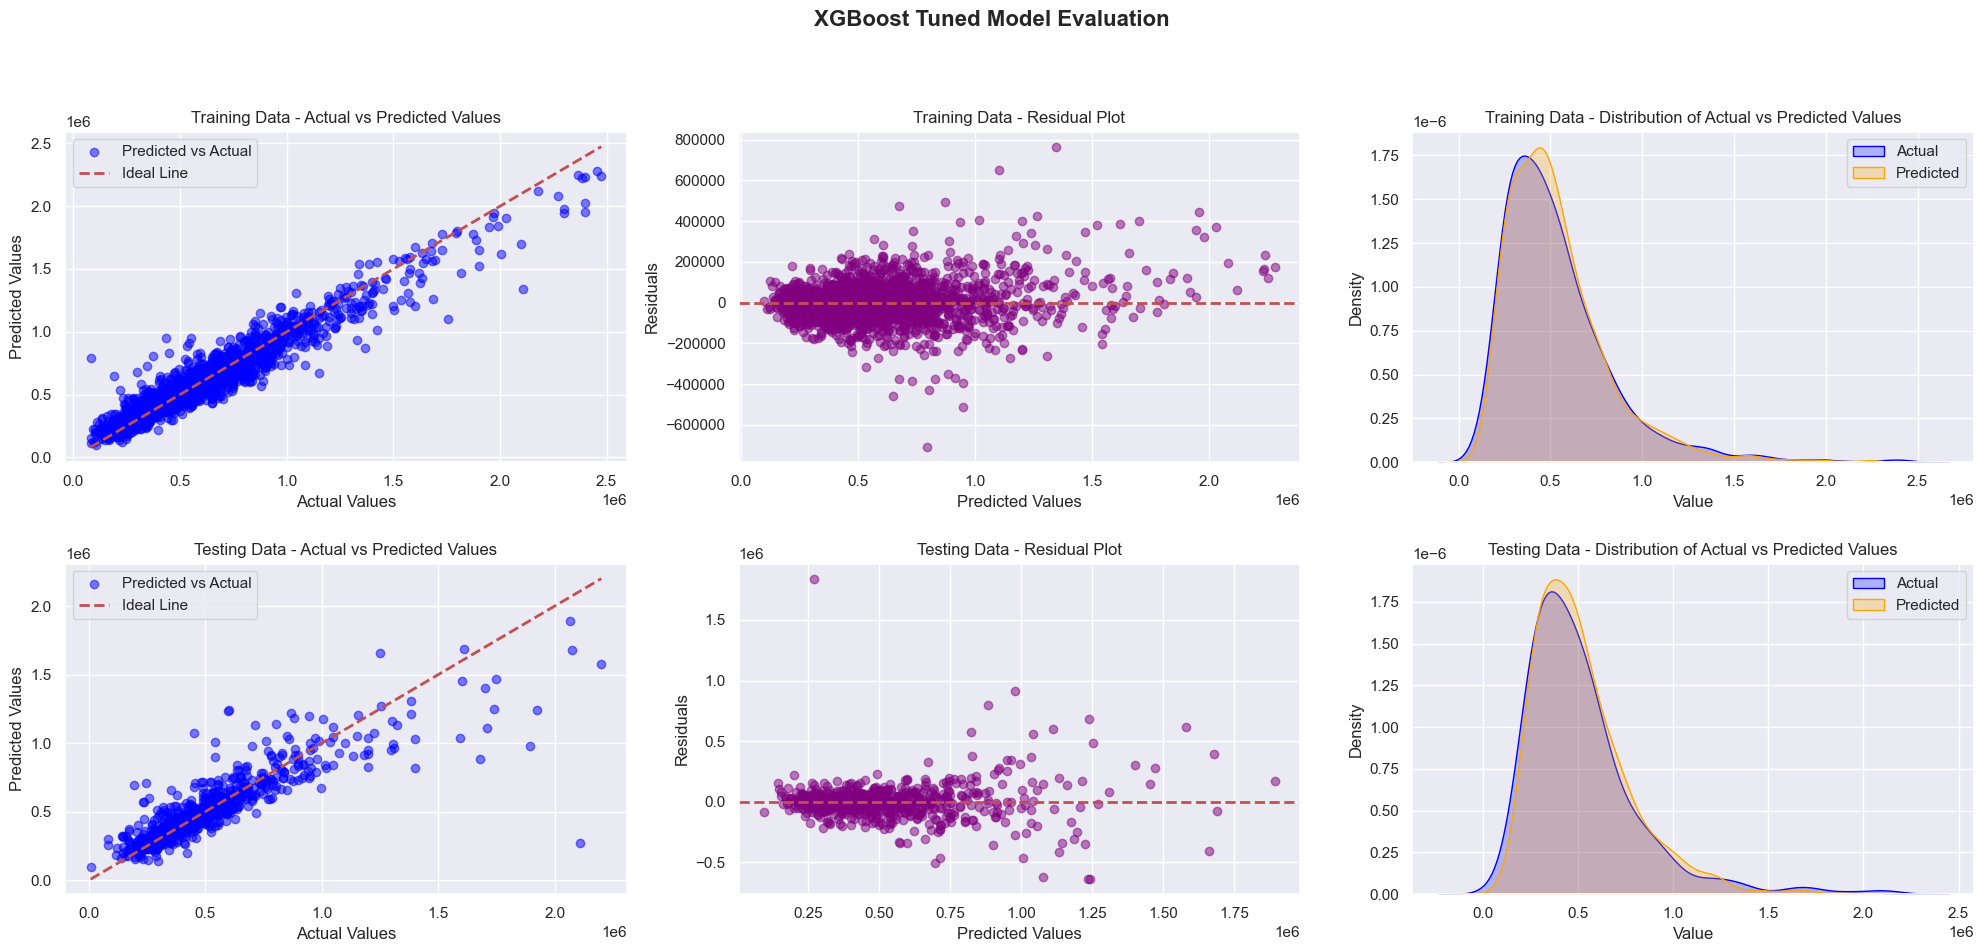

In [26]:
model_evaluation(
    X_train_selected_3,
    y_train,
    X_test_selected_3,
    y_test,
    "XGBoost Tuned",
    model_to_evaluate=best_model,
)

# 5. Evaluation

## 5.1. Evaluate Results

House Price Prediction Data Science Project Results:

- Insight baru didapatkan dari eksplorasi data yang telah dilakukan pada sub bab 2.3. Explore Data yang mencakup:
  - Karakteristik rumah berdasarkan harga rumah yaitu Luxury, High, Moderate, Affordable
  - Didapatkan ciri-ciri kategorisasi rumah berdasarkan gaya arsitektur rumah
  - Didapatkan faktor-faktor yang mempengaruhi harga rumah
- Namun pada project ini, nilai MAE yang dihasilkan dari model masih lebih dari 5% dari rata-rata harga rumah yaitu sekitar 16% dari rata-rata harga rumah.

Diharapkan dari temuan-temuan yang didapatkan pada point 1 mampu membantu dalam pengambilan keputusan bisnis, meningkatkan pendapatan perusahaan, dan meningkatkan strategi pemasaran yang efektif.

## 5.2. Review Process

Proses yang dilakukan pada House Price Prediction Data Science Project ini mengikuti framework CRISP-DM yaitu:
1. Business Understanding: memahami permasalahan bisnis secara mendalam dari latar belakang, penentuan objektif bisnis, kemudian menentukan bisnis goals yang ingin dicapai secara spesifik dan dapat diukur sampai penentuan data science objective dan data science success criteria yang bertujuan untuk menjawab business objective.
2. Data Understanding: mengetahui data secara mendetail dengan melakukan statistika deskriptif dan melakukan ekslorasi analisis guna menentukan insightful information untuk menjawab data science objective yang pertama. setelahnya pengecekan data quality untuk memastikan data yang digunakan untuk pemodelan memiliki kualitas sesuai kriteria.
3. Data Preparation: bertujuan untuk menyiapkan data untuk keperluan pemodelan. proses preparation disesuaikan dengan temuan yang didapat dari data understanding.
4. Modeling: Pembangunan predictive model dengan data yang sudah melalui proses preparation. berisikan pembangunan model, pengaturan parameter, dan evaluasi model.
5. Evaluation: Berisikan evaluasi project secara menyeluruh disesuaikan dengan business objective dan menentukan next steps
6. Deployment: merupakan tahap akhir dari siklus CRISP-DM bertujuan untuk mengembangkan model yang sudah memenuhi data science success criteria.

## 5.3. Determine Next Steps

Model yang dihasilkan belum memenuhi data sciencce success criteria karena hasil evaluas error yaitu MAE dari mdoel masih diatas 5%. Sehingga dari sini perlu ada langkah-langkah lanjutan untuk meningkatkan performa dari model, beberapa hal yang bisa dilakukan adalah:
- Model masih gagal memprediksi rumah dengan harga tinggi yang berada di kota Issaquah dan Tukwila karena rata-rata harga rumah disana cenderung rendah. Di kota Issqruah dipengaruhi oleh faktor bencana alam. Untuk kota Tukwila memiliki harga rata-rata yang cukup rendah yaitu sekitar 200 juta. Sehingga perlu adanya penyesuain data dengan menambahkan data rumah yang berlokasi di kedua kota tersebut dengan kelas harga Luxury
- Error extreme terjadi pada data harga rumah sangat rendah dan sangat tinggi. Sehingga perlu tambahan data untuk harga rumah dengan dua kategori tersebut

# 6. Deployment

Model belum memenuhi sukses kriteria data science point 4 sehingga belum bisa dilakukan deployment

In [27]:
save_model(best_model, "../models/final_model.pkl")

# 7. Conclution

House price prediction project menghasilkan beberapa luaran. Luaran yaitu mendapatkan insight baru dari kategorisasasi rumah berdasarkan harga dan gaya arsitektur rumah, kemudian didapatkan juga insight-insight mengenai faktor-faktor yang mempengaruhi harga rumah salah satu variable yang paling berpengaruh adalah luas bangunan rumah. Namun untuk luaran model yang dihasilkan dari project ini berlum mencapai kriteria sukses yang telah ditentukan. Nilia MAE dari model prediksi menghasilkan sekitar 16% dari rata-rata harga rumah. Sehingga project ini perlu langkah lanjutan dengan menambah jumlah data pada rumah dengan harga relatif murah dan harga rumah relatif mahal untuk menunjang performa model. Beberapa temuan penting yang dihasilkan dari project ini adalah:
- Distribusi dari rumah condong kekanan atau positively skewed, sehingga hanya ada sedikit rumah yang memiliki harga yang tinggi. Hal ini sesuai dengan kelas harga rumah paling banyak adalah kelas Moderate. Sementara kelas rumah Luxury dan Affordable berada dinomer dua terbawah. Dengan 1255 rumah berada di Seattle. sisanya teresebar di 40 kota lainnya.
- Luas bangunan memiliki korelasi linear positif yang kuat dengan harga rumah. Sementara Luas basement dengan mengabaikan rumah tanpa basemenet memiliki korelasi linear positif sedang dengan harga rumah.
- Terdapat hubungan linear positif yang sangat signifikan antara variable bathrooms dan bedrooms secara individual dengan luas bangunan rumah dengan hubungan yang kuat. hal ini berarti semakin banyak jumlah bathrooms dan bedrooms maka akan semakin luas juga bangunan rumah. Tanpa mempertimbangkan variable lain.
- Rumah dengan gaya arsitektur klasik atau rumah yang dibangun sebelum 1940 (era sebelum perang) memiliki harga rata-rata berdasarkan tahun rumah dibangun cenderung lebih tinggi dibandingkan dengan rata-rata keseluruhan. Terdapat hal yang menarik, rumah dengan gaya arsitektur klasik tersebut memilik harga rata-rata lebih tinggi jika rumah tersebut memiliki basement dan belum direnovasi. Berarti berdasarkan data mempertahankan nuansa klasik dari rumah terebut bisa menaikan harga rumah. Rekomendasi dari tim kami untuk investasi jika terdapat rumah dengan gaya arsitektur klasik dengan spesifikasi yang sudah disebutkan dengan harga dibawah rata-rata bisa langsung dibeli dan di maintain dengan baik untuk menjadikan rumah tersebut ke kelas Luxury.

Diharapkan dari project data science ini bisa memberikan konstribusi dalam mencapai tujuan bisnis yaitu meningkatkan efektifitas strategi pemasaran dan penghasilakn perusahaan.